In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Crime = pd.read_csv("crime_data.csv")
Crime.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [2]:
Crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [3]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
# Normalizing the data
df_norm = norm_func(Crime.iloc[:,1:])
df_norm.head(5)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


## Finding out the optimal number of clusters

In [5]:
from sklearn.cluster import KMeans

C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


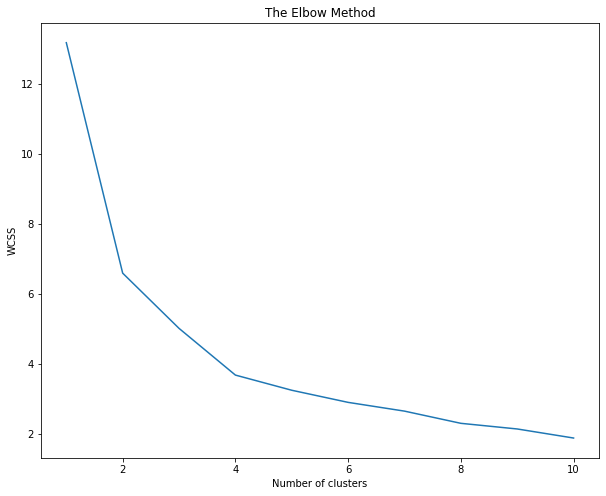

In [6]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## KMean

In [7]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(df_norm)

In [8]:
y_kmeans
clf.labels_

array([0, 1, 1, 0, 1, 1, 3, 3, 1, 0, 3, 2, 1, 3, 2, 3, 2, 0, 2, 1, 3, 1,
       2, 0, 1, 2, 2, 1, 2, 3, 1, 1, 0, 2, 3, 3, 3, 3, 3, 0, 2, 0, 1, 3,
       2, 3, 3, 2, 2, 3])

In [9]:
y_kmeans

array([0, 1, 1, 0, 1, 1, 3, 3, 1, 0, 3, 2, 1, 3, 2, 3, 2, 0, 2, 1, 3, 1,
       2, 0, 1, 2, 2, 1, 2, 3, 1, 1, 0, 2, 3, 3, 3, 3, 3, 0, 2, 0, 1, 3,
       2, 3, 3, 2, 2, 3])

In [10]:
clf.cluster_centers_

array([[0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.29254518, 0.32148973, 0.70974576, 0.29667313]])

In [11]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch        # For creating dendrogram


## H Clustering 

### Euclidean distance, Average

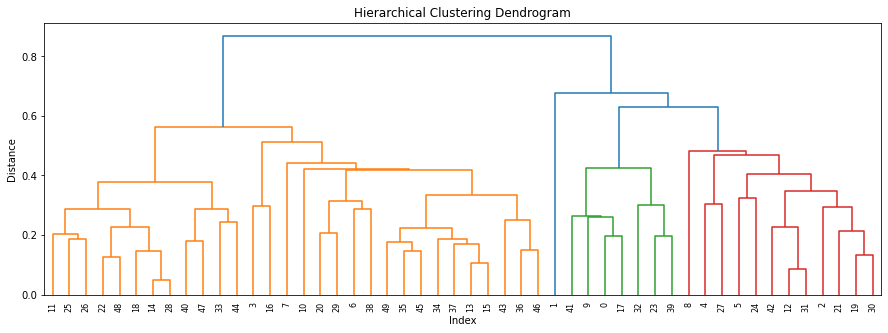

In [12]:
z = linkage(df_norm, method ="average", metric="euclidean")
plt.figure(figsize=(15,5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram( z, )
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity= 'euclidean').fit(df_norm)

cluster_labels= pd.Series(h_complete.labels_)
cluster_labels

Crime['Clust'] = cluster_labels  # Creating new column and assigning it to new column 
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [19]:
stats =Crime.sort_values("Murder", ascending=True)
stats.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
33,North Dakota,0.8,45,44,7.3,2
28,New Hampshire,2.1,57,56,9.5,2
18,Maine,2.1,83,51,7.8,2
14,Iowa,2.2,56,57,11.3,2
44,Vermont,2.2,48,32,11.2,2


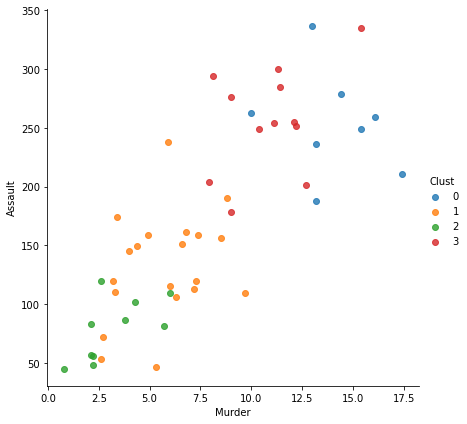

In [16]:
# Plot between pairs Murder~Assault
sns.lmplot( 'Murder','Assault',  data=stats,
        hue = 'Clust',
        fit_reg=False, size = 6 );

C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


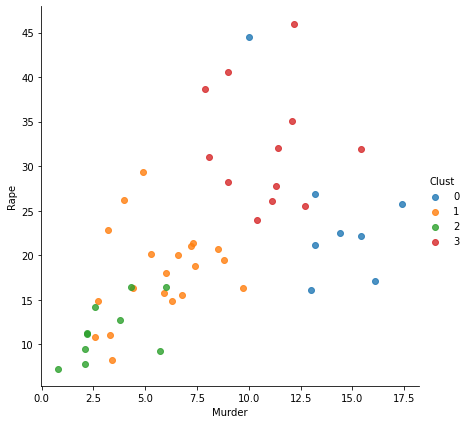

In [17]:
# Plot between pairs Murder~Rape
sns.lmplot( 'Murder','Rape',  data=Crime,
        hue = 'Clust',
        fit_reg=False, size = 6 );

C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


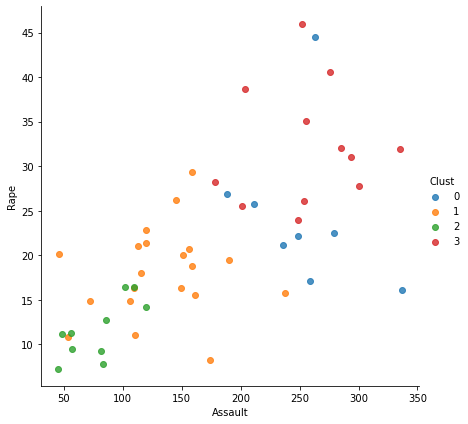

In [18]:
# Plot between pairs Assault~Rape
sns.lmplot( 'Assault','Rape',  data=Crime,
        hue = 'Clust',
        fit_reg=False, size = 6 );

## DBSCAN 

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [29]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(Crime.iloc[:,1:])
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.48365074],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.48365074],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.4446073 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.50756473],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.4446073 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.4446073 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.50756473],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.50756473],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.4446073 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.48365074],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.50756473],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.46852129],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.4446073 ],
       [-0.13637203, -0.70012057, -0.0

In [30]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [31]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  2, -1,  1,  2,  1, -1,
        0,  2, -1,  1, -1,  1, -1, -1,  2,  2, -1,  2,  1, -1, -1, -1,  2,
        1,  1,  1,  1,  1,  0,  2,  0, -1,  1,  2,  1,  1,  2,  1,  1],
      dtype=int64)

In [25]:
dbscan.

DBSCAN(eps=1, min_samples=4)

In [32]:
# Adding clusters to dataset
crime = Crime.iloc[:,1:]
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,Clust,clusters
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,0,-1
2,8.1,294,80,31.0,3,-1
3,8.8,190,50,19.5,1,-1
4,9.0,276,91,40.6,3,-1
5,7.9,204,78,38.7,3,-1
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,1,-1
8,15.4,335,80,31.9,3,-1
9,17.4,211,60,25.8,0,-1


In [33]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape,Clust
,,mean,mean,mean,mean,mean
0,-1,10.8400,236.8000,69.7000,28.1150,2.0
1,0,14.0500,238.0000,57.7500,23.2000,0.0
2,1,5.2875,128.9375,72.4375,18.1375,1.0
3,2,3.1800,78.7000,49.3000,11.6300,2.0


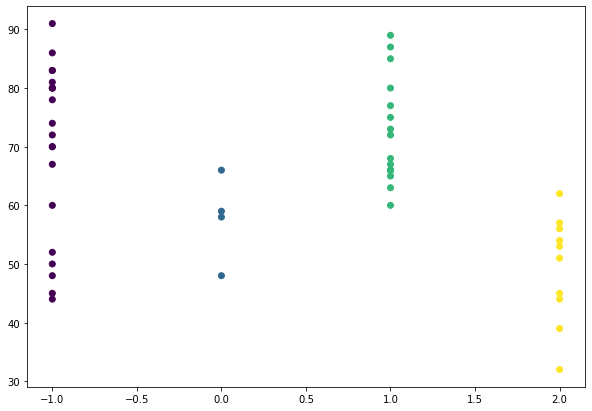

In [34]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_) 

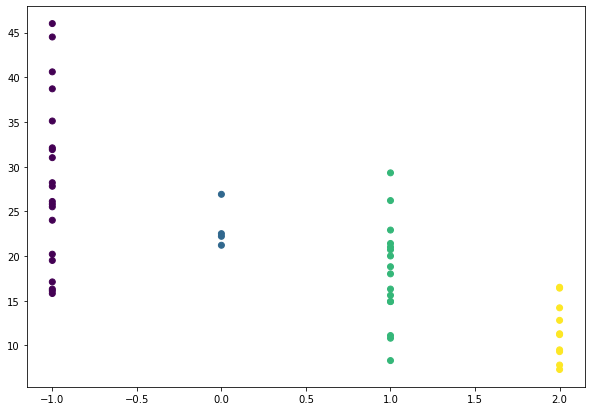

In [35]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['Rape'], c=dbscan.labels_) 